In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import dask.distributed as dsk
import glob
import matplotlib.gridspec as gs
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr 
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from xarrayMannKendall import *
from matplotlib.lines import Line2D
from palettable.colorbrewer.qualitative import Set3_11

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

figdir = '/home/561/jn8053/g_e14/figures-tmp/'

clnt = dsk.Client()
clnt

<Client: 'tcp://127.0.0.1:45885' processes=6 threads=24, memory=268.44 GB>

In [40]:
# Font size
plt.rcParams['font.size'] = 16
# Axes
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
# Saving parameters
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

def change_lon_space(ds, grid):
    if grid == 'u':
        ds = ds.rename(({'xu_ocean':'lon', 'yu_ocean':'lat'}))
        ds['_lon_adj'] = xr.where(ds['lon'] < 0, ds['lon'] + 360, ds['lon'])
        ds = ds.swap_dims({'lon': '_lon_adj'})
        ds = ds.sel(**{'_lon_adj': sorted(ds._lon_adj)}).drop('lon')
        ds = ds.rename({'_lon_adj': 'lon'})
    elif grid == 't':
        ds = ds.rename(({'xt_ocean':'lon', 'yt_ocean':'lat'}))
        ds['_lon_adj'] = xr.where(ds['lon'] < 0, ds['lon'] + 360, ds['lon'])
        ds = ds.swap_dims({'lon': '_lon_adj'})
        ds = ds.sel(**{'_lon_adj': sorted(ds._lon_adj)}).drop('lon')
        ds = ds.rename({'_lon_adj': 'lon'})
    elif grid == 'longitude':
        ds = ds.rename(({'longitude':'lon', 'latitude':'lat'}))     
        ds['_lon_adj'] = xr.where(ds['lon'] < 0, ds['lon'] + 360, ds['lon'])
        ds = ds.swap_dims({'lon': '_lon_adj'})
        ds = ds.sel(**{'_lon_adj': sorted(ds._lon_adj)}).drop('lon')
        ds = ds.rename({'_lon_adj': 'lon'})
    return ds

def circumpolar_map(*, land = True):
    
    fig = plt.figure(figsize = (30, 13))
    axs = [fig.add_subplot(211, projection = ccrs.Mercator(central_longitude = 200)),
           fig.add_subplot(212, projection = ccrs.Mercator(central_longitude = 200))]
    for ax in axs:
        ax.set_extent([-180, 180, -80, -50], crs = ccrs.PlateCarree())
        if land:
            ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                           edgecolor = 'black', facecolor = 'white'))
        else:
            ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                           edgecolor = 'black', facecolor = 'none'))
        ax.set_xticks(np.arange(-150, 200, 50), crs = ccrs.PlateCarree())
        ax.set_yticks([-75, -70, -65, -60, -55], crs = ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(zero_direction_label = False)
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
    
    return fig, axs

def circumpolar_map_clim(*, land = True):
    
    fig = plt.figure(figsize = (30, 13))
    axs = [fig.add_subplot(421, projection = ccrs.Mercator(central_longitude = 200)),
           fig.add_subplot(422, projection = ccrs.Mercator(central_longitude = 200)),
           fig.add_subplot(423, projection = ccrs.Mercator(central_longitude = 200)),
           fig.add_subplot(424, projection = ccrs.Mercator(central_longitude = 200)),
           fig.add_subplot(425, projection = ccrs.Mercator(central_longitude = 200)),
           fig.add_subplot(426, projection = ccrs.Mercator(central_longitude = 200)),
           fig.add_subplot(427, projection = ccrs.Mercator(central_longitude = 200)),
           fig.add_subplot(428, projection = ccrs.Mercator(central_longitude = 200))]
    
    for ax in axs:
        ax.set_extent([-180, 180, -80, -50], crs = ccrs.PlateCarree())
        if land:
            ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                           edgecolor = 'black', facecolor = 'white'))
        else:
            ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                           edgecolor = 'black', facecolor = 'none'))
        ax.set_xticks(np.arange(-150, 200, 50), crs = ccrs.PlateCarree())
        ax.set_yticks([-75, -70, -65, -60, -55], crs = ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(zero_direction_label = False)
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
    axs[0].set_title('JRA55'); axs[1].set_title('ERA5')
    axs[0].text(0.2, 0.1, 'DJF', fontsize = 16, transform = axs[0].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
    axs[2].text(0.2, 0.1, 'MAM', fontsize = 16, transform = axs[2].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
    axs[4].text(0.2, 0.1, 'JJA', fontsize = 16, transform = axs[4].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
    axs[6].text(0.2, 0.1, 'SON', fontsize = 16, transform = axs[6].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
    axs[1].text(0.2, 0.1, 'DJF', fontsize = 16, transform = axs[1].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
    axs[3].text(0.2, 0.1, 'MAM', fontsize = 16, transform = axs[3].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
    axs[5].text(0.2, 0.1, 'JJA', fontsize = 16, transform = axs[5].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
    axs[7].text(0.2, 0.1, 'SON', fontsize = 16, transform = axs[7].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))

    return fig, axs

def extract_so(ds):
    ds_so = ds.sel(lat = slice(None, -50))
    return ds_so

In [10]:
uas_jra = xr.open_dataset('/scratch/e14/jn8053/jra55/uas-v14-monthly-1958_2019.nc').sel(lat = slice(None, -50)).sel(time = slice('1979-01-01', '2015-01-01'))

path_u = np.sort(glob.glob('/g/data/rt52/era5/single-levels/reanalysis/10u/*/'))[:-7]

print(path_u[0])
print(path_u[-1])

uas = xr.open_mfdataset(path_u[0]+'*.nc').sortby('latitude').sel(latitude = slice(None, -50))
for p in path_u[1:]:
    u = xr.open_mfdataset(p+'*.nc').sortby('latitude').sel(latitude = slice(None, -50))
    uas = xr.concat([uas, u], dim = 'time')
uas_monthly = uas.resample(time = '1MS').mean('time')
uas_monthly['time'] = uas_jra['time'].values
uas_monthly.to_netcdf('/scratch/e14/jn8053/era5/uas-monthly-1979_2015.nc')

In [21]:
path_v = np.sort(glob.glob('/g/data/rt52/era5/single-levels/reanalysis/10v/*/'))[:-7]

print(path_v[0])
print(path_v[-1])

vas = xr.open_mfdataset(path_v[0]+'*.nc').sortby('latitude').sel(latitude = slice(None, -50))
for p in path_v[1:]:
    v = xr.open_mfdataset(p+'*.nc').sortby('latitude').sel(latitude = slice(None, -50))
    vas = xr.concat([vas, v], dim = 'time')
vas_monthly = vas.resample(time = '1MS').mean('time')
vas_monthly['time'] = uas_jra['time'].values
vas_monthly.to_netcdf('/scratch/e14/jn8053/era5/vas-monthly-1979_2015.nc')

/g/data/rt52/era5/single-levels/reanalysis/10v/1979/
/g/data/rt52/era5/single-levels/reanalysis/10v/2014/


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ... 

# Mean fields (historical period)

In [22]:
hu = xr.open_dataset('~/g_e14/misc/hu-01deg.nc')['hu']
hu = extract_so(change_lon_space(hu, 'u'))

In [24]:
# JRA55do-v14
uas_jra = xr.open_dataset('/scratch/e14/jn8053/jra55/uas-v14-monthly-1958_2019.nc').sel(lat = slice(None, -50)).sel(time = slice('1979-01-01', '2015-01-01'))
vas_jra = xr.open_dataset('/scratch/e14/jn8053/jra55/vas-v14-monthly-1958_2019.nc').sel(lat = slice(None, -50)).sel(time = slice('1979-01-01', '2015-01-01'))

# ERA-Interim
uas_era = xr.open_dataset('/scratch/e14/jn8053/era5/uas-monthly-1979_2015.nc')
uas_era = change_lon_space(uas_era, 'longitude')
vas_era = xr.open_dataset('/scratch/e14/jn8053/era5/vas-monthly-1979_2015.nc')
vas_era = change_lon_space(vas_era, 'longitude')

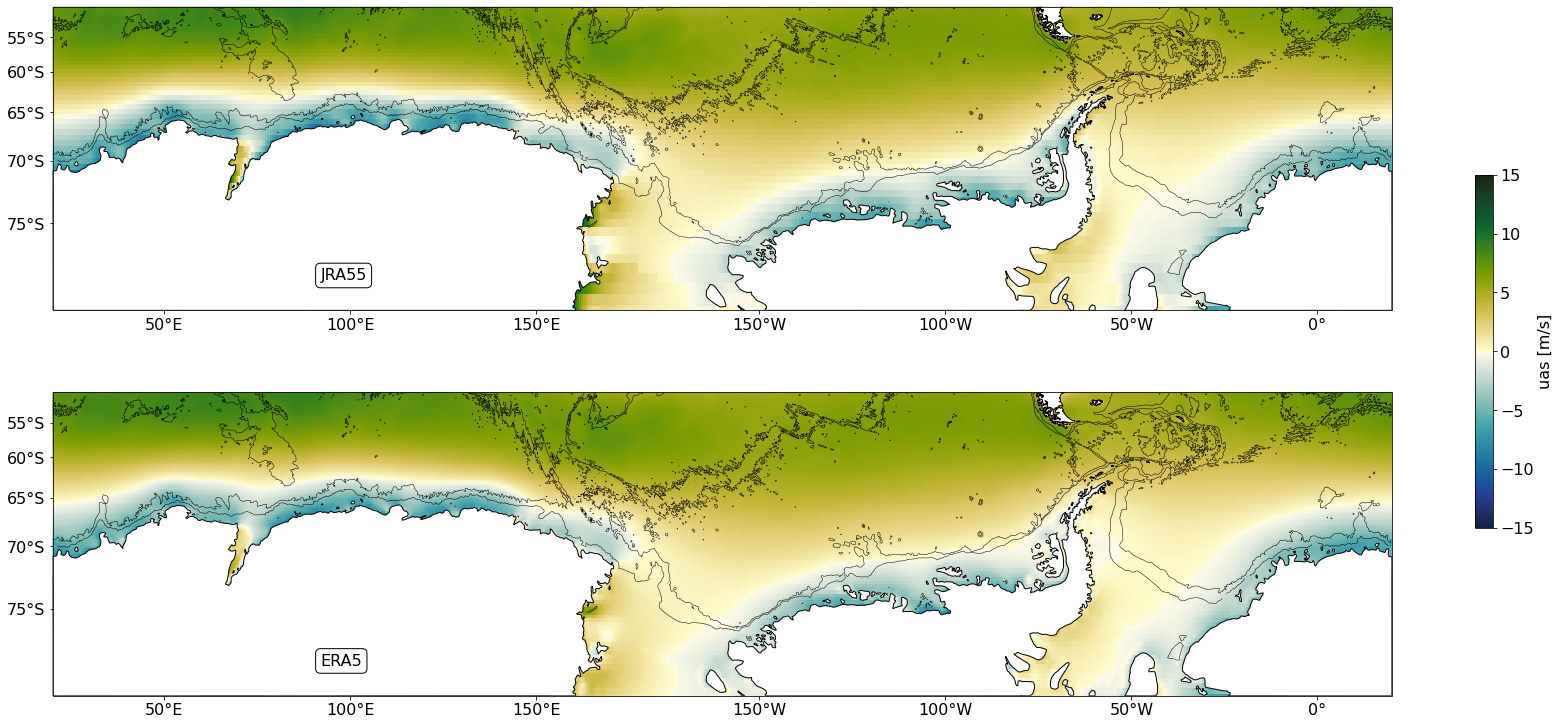

In [26]:
fig, axs = circumpolar_map()
axs[0].pcolormesh(uas_jra['lon'], uas_jra['lat'], uas_jra['uas'].mean('time'), 
               vmin = -15, vmax = 15, cmap = cmocean.cm.delta, transform = ccrs.PlateCarree())
axs[0].contour(hu['lon'], hu['lat'], hu, levels = [1000, 3000], colors = ['k'], linewidths = [.5], transform = ccrs.PlateCarree())
axs[0].text(0.2, 0.1, 'JRA55', fontsize = 16, transform = axs[0].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))

cf = axs[1].pcolormesh(uas_era['lon'], uas_era['lat'], uas_era['u10'].mean('time'),
               vmin = -15, vmax = 15, cmap = cmocean.cm.delta, transform = ccrs.PlateCarree())
axs[1].contour(hu['lon'], hu['lat'], hu, levels = [1000, 3000], colors = ['k'], linewidths = [.5], transform = ccrs.PlateCarree())
axs[1].text(0.2, 0.1, 'ERA5', fontsize = 16, transform = axs[1].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))

fig.colorbar(cf, ax = axs[:], shrink = .5).set_label('uas [m/s]')
plt.savefig(figdir+'/easterlies-collaborative/uas-jra55_vs_era5-historical-mean.png', facecolor = 'white')

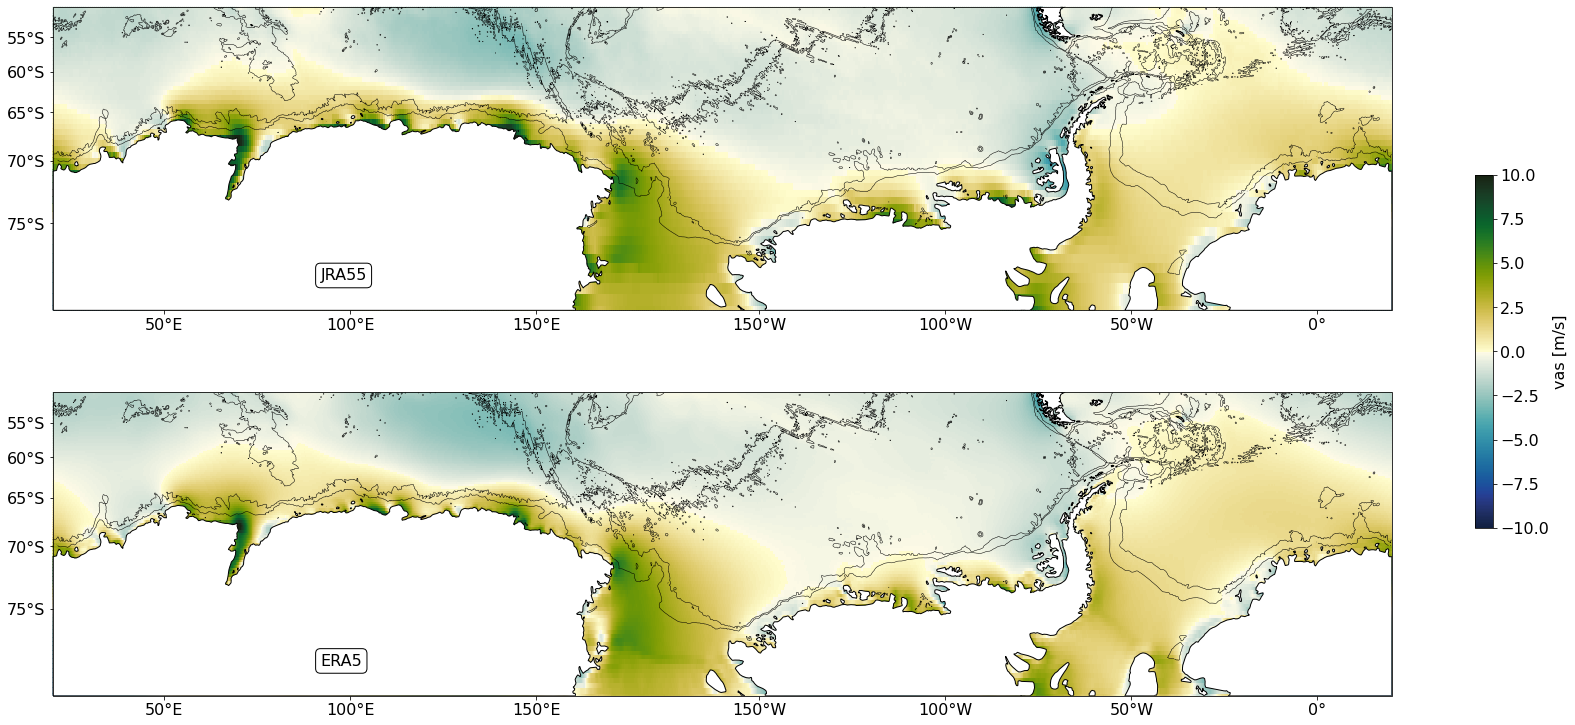

In [28]:
fig, axs = circumpolar_map()
axs[0].pcolormesh(vas_jra['lon'], vas_jra['lat'], vas_jra['vas'].mean('time'), 
               vmin = -10, vmax = 10, cmap = cmocean.cm.delta, transform = ccrs.PlateCarree())
axs[0].contour(hu['lon'], hu['lat'], hu, levels = [1000, 3000], colors = ['k'], linewidths = [.5], transform = ccrs.PlateCarree())
axs[0].text(0.2, 0.1, 'JRA55', fontsize = 16, transform = axs[0].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))

cf = axs[1].pcolormesh(vas_era['lon'], vas_era['lat'], vas_era['v10'].mean('time'),
               vmin = -10, vmax = 10, cmap = cmocean.cm.delta, transform = ccrs.PlateCarree())
axs[1].contour(hu['lon'], hu['lat'], hu, levels = [1000, 3000], colors = ['k'], linewidths = [.5], transform = ccrs.PlateCarree())
axs[1].text(0.2, 0.1, 'ERA5', fontsize = 16, transform = axs[1].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))

fig.colorbar(cf, ax = axs[:], shrink = .5).set_label('vas [m/s]')
plt.savefig(figdir+'/easterlies-collaborative/vas-jra55_vs_era5-historical-mean.png', facecolor = 'white')

# Trends

In [33]:
#MK_trends_uas = {}
#MK_class = Mann_Kendall_test(uas_jra['uas'], 'time', coords_name = {'time':'time', 'lat':'y', 'lon':'x'})
#MK_trends_uas['JRA'] = MK_class.compute()
MK_class = Mann_Kendall_test(uas_era['u10'], 'time', coords_name = {'time':'time', 'lat':'y', 'lon':'x'})
MK_trends_uas['ERA'] = MK_class.compute()

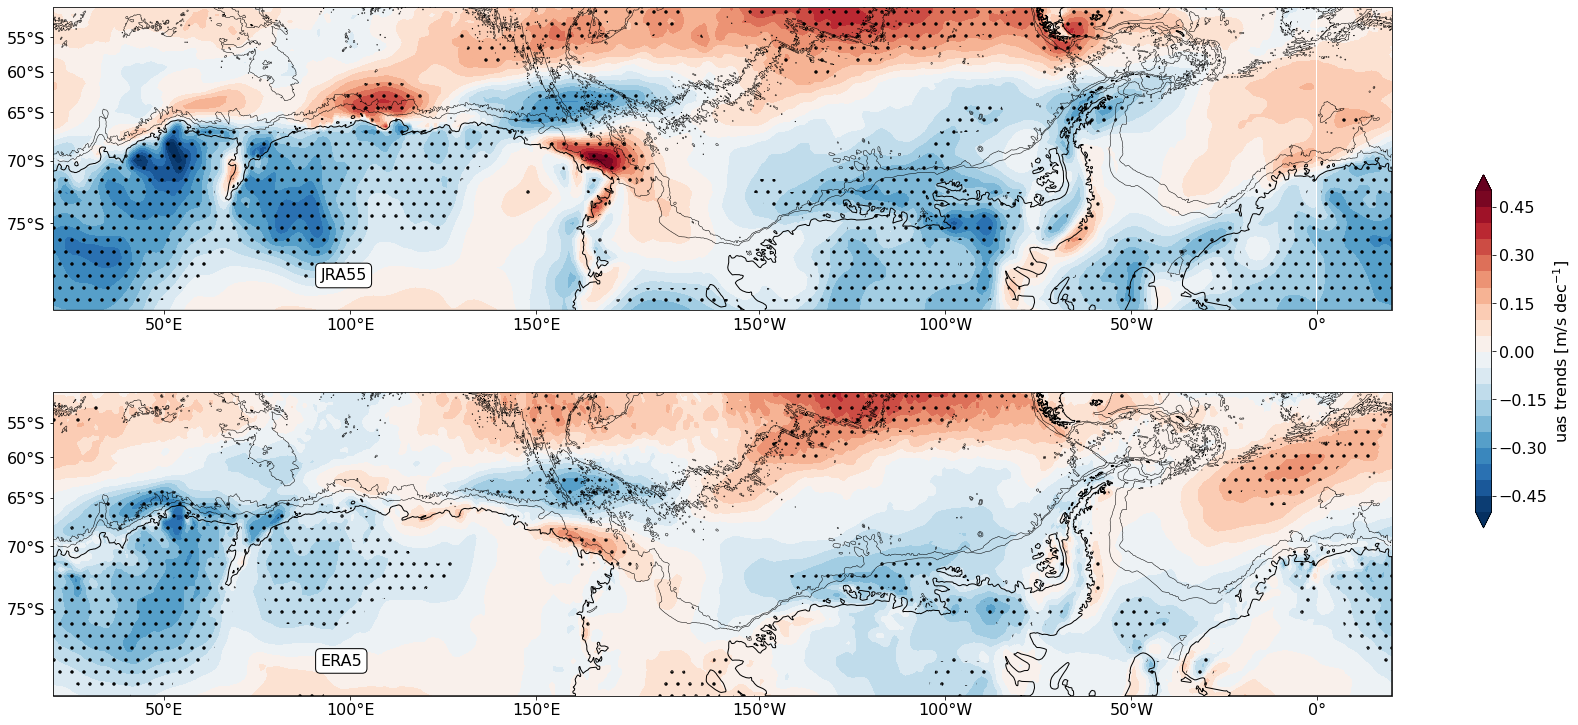

In [34]:
fig, axs = circumpolar_map(land = False)
t = axs[0].contourf(MK_trends_uas['JRA']['x'], MK_trends_uas['JRA']['y'], MK_trends_uas['JRA']['trend']*120,
                 cmap = 'RdBu_r', levels = np.arange(-.5, .55, .05), extend = 'both', transform = ccrs.PlateCarree())
axs[0].contourf(MK_trends_uas['JRA']['x'], MK_trends_uas['JRA']['y'],
             MK_trends_uas['JRA']['p'].where(MK_trends_uas['JRA']['p'] <= .1), 
             colors = ['none'], hatches = ['.'], transform = ccrs.PlateCarree())
axs[0].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
            linewidths = 0.5, transform = ccrs.PlateCarree())
axs[0].text(0.2, 0.1, 'JRA55', fontsize = 16, transform = axs[0].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))

t = axs[1].contourf(MK_trends_uas['ERA']['x'], MK_trends_uas['ERA']['y'], MK_trends_uas['ERA']['trend']*120,
                 cmap = 'RdBu_r', levels = np.arange(-.5, .55, .05), extend = 'both', transform = ccrs.PlateCarree())
axs[1].contourf(MK_trends_uas['ERA']['x'], MK_trends_uas['ERA']['y'],
             MK_trends_uas['ERA']['p'].where(MK_trends_uas['ERA']['p'] <= .1), 
             colors = ['none'], hatches = ['.'], transform = ccrs.PlateCarree())
axs[1].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
            linewidths = 0.5, transform = ccrs.PlateCarree())
axs[1].text(0.2, 0.1, 'ERA5', fontsize = 16, transform = axs[1].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))

fig.colorbar(t, ax = axs[:], shrink = .5).set_label('uas trends [m/s dec$^{-1}$]')
plt.savefig(figdir+'/easterlies-collaborative/uas-jra55_vs_era5-historical-trend.png', facecolor = 'white')

In [35]:
MK_trends_vas = {}
MK_class = Mann_Kendall_test(vas_jra['vas'], 'time', coords_name = {'time':'time', 'lat':'y', 'lon':'x'})
MK_trends_vas['JRA'] = MK_class.compute()
MK_class = Mann_Kendall_test(vas_era['v10'], 'time', coords_name = {'time':'time', 'lat':'y', 'lon':'x'})
MK_trends_vas['ERA'] = MK_class.compute()

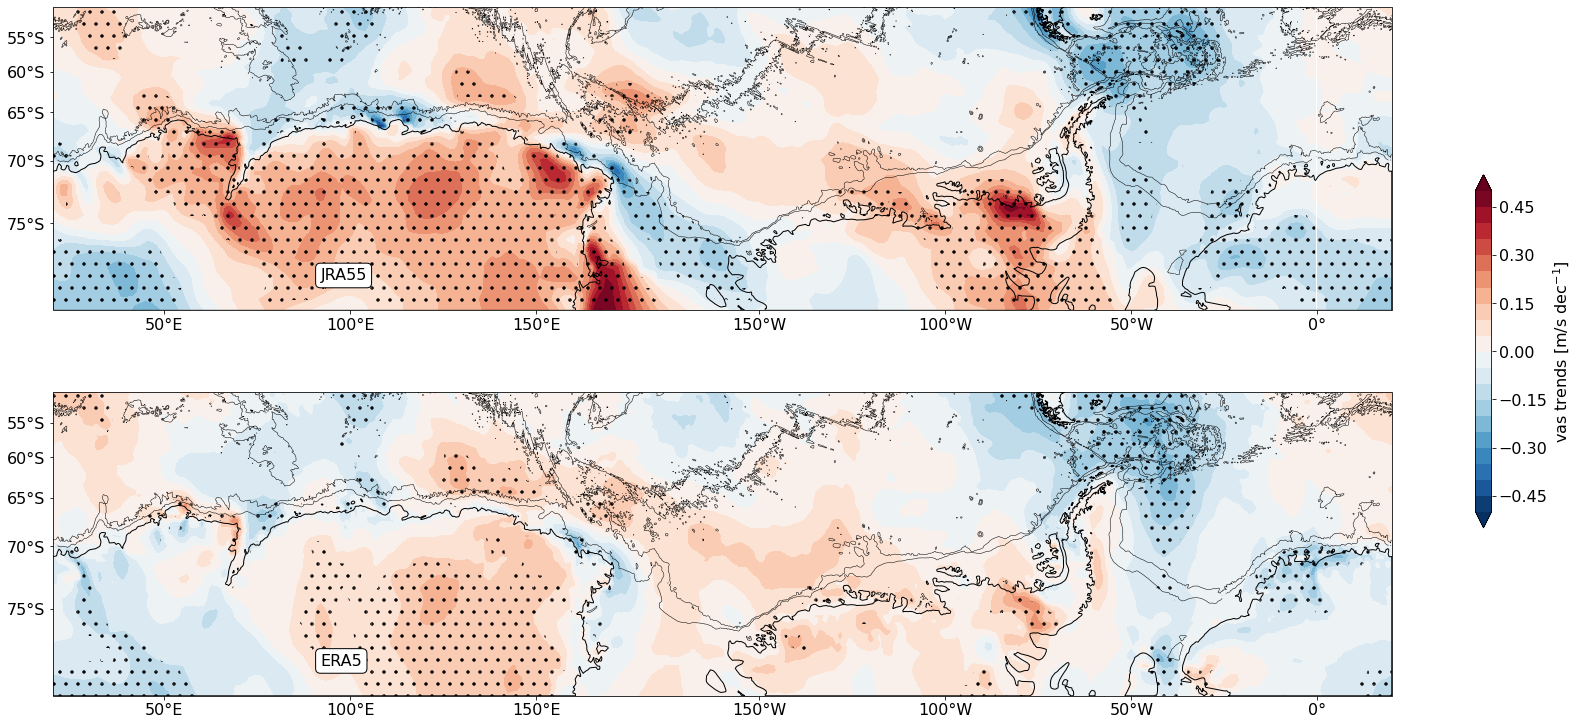

In [36]:
fig, axs = circumpolar_map(land = False)
t = axs[0].contourf(MK_trends_vas['JRA']['x'], MK_trends_vas['JRA']['y'], MK_trends_vas['JRA']['trend']*120,
                 cmap = 'RdBu_r', levels = np.arange(-.5, .55, .05), extend = 'both', transform = ccrs.PlateCarree())
axs[0].contourf(MK_trends_vas['JRA']['x'], MK_trends_vas['JRA']['y'],
             MK_trends_vas['JRA']['p'].where(MK_trends_vas['JRA']['p'] <= .1), 
             colors = ['none'], hatches = ['.'], transform = ccrs.PlateCarree())
axs[0].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
            linewidths = 0.5, transform = ccrs.PlateCarree())
axs[0].text(0.2, 0.1, 'JRA55', fontsize = 16, transform = axs[0].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))

t = axs[1].contourf(MK_trends_vas['ERA']['x'], MK_trends_vas['ERA']['y'], MK_trends_vas['ERA']['trend']*120,
                 cmap = 'RdBu_r', levels = np.arange(-.5, .55, .05), extend = 'both', transform = ccrs.PlateCarree())
axs[1].contourf(MK_trends_vas['ERA']['x'], MK_trends_vas['ERA']['y'],
             MK_trends_vas['ERA']['p'].where(MK_trends_vas['ERA']['p'] <= .1), 
             colors = ['none'], hatches = ['.'], transform = ccrs.PlateCarree())
axs[1].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
            linewidths = 0.5, transform = ccrs.PlateCarree())
axs[1].text(0.2, 0.1, 'ERA5', fontsize = 16, transform = axs[1].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))

fig.colorbar(t, ax = axs[:], shrink = .5).set_label('vas trends [m/s dec$^{-1}$]')
plt.savefig(figdir+'/easterlies-collaborative/vas-jra55_vs_era5-historical-trend.png', facecolor = 'white')

# Climatology

In [39]:
uas_jra_s = uas_jra['uas'].groupby('time.season').mean('time') - uas_jra['uas'].mean('time')
vas_jra_s = vas_jra['vas'].groupby('time.season').mean('time') - vas_jra['vas'].mean('time')
uas_era_s = uas_era['u10'].groupby('time.season').mean('time') - uas_era['u10'].mean('time')
vas_era_s = vas_era['v10'].groupby('time.season').mean('time') - vas_era['v10'].mean('time')

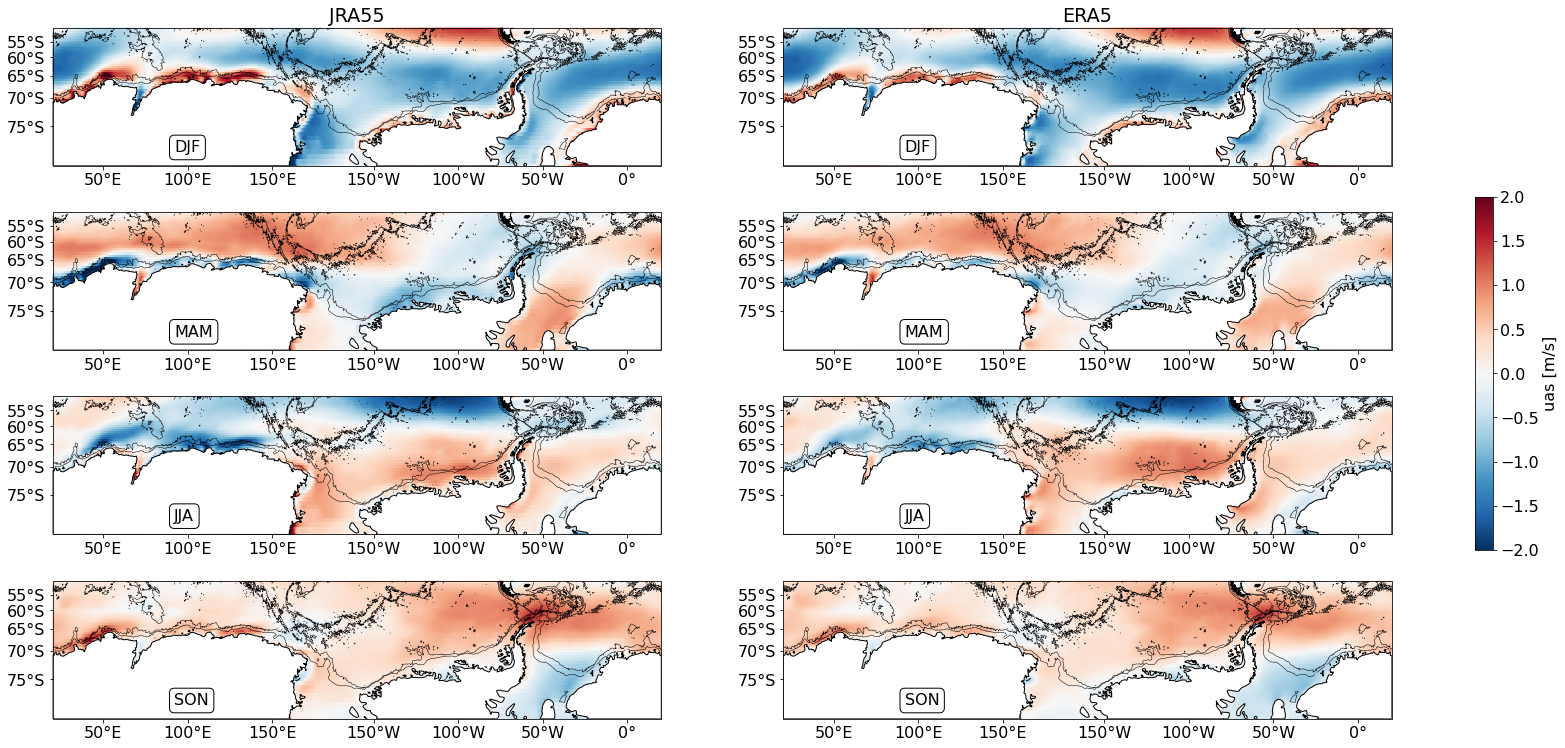

In [41]:
fig, axs = circumpolar_map_clim()
axs[0].pcolormesh(uas_jra_s['lon'], uas_jra_s['lat'], uas_jra_s.sel(season = 'DJF'), 
                  vmin = -2, vmax = 2, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
axs[1].pcolormesh(uas_era_s['lon'], uas_era_s['lat'], uas_era_s.sel(season = 'DJF'), 
                  vmin = -2, vmax = 2, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
axs[2].pcolormesh(uas_jra_s['lon'], uas_jra_s['lat'], uas_jra_s.sel(season = 'MAM'), 
                  vmin = -2, vmax = 2, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
axs[3].pcolormesh(uas_era_s['lon'], uas_era_s['lat'], uas_era_s.sel(season = 'MAM'), 
                  vmin = -2, vmax = 2, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
axs[4].pcolormesh(uas_jra_s['lon'], uas_jra_s['lat'], uas_jra_s.sel(season = 'JJA'), 
                  vmin = -2, vmax = 2, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
axs[5].pcolormesh(uas_era_s['lon'], uas_era_s['lat'], uas_era_s.sel(season = 'JJA'), 
                  vmin = -2, vmax = 2, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
axs[6].pcolormesh(uas_jra_s['lon'], uas_jra_s['lat'], uas_jra_s.sel(season = 'SON'), 
                  vmin = -2, vmax = 2, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
c = axs[7].pcolormesh(uas_era_s['lon'], uas_era_s['lat'], uas_era_s.sel(season = 'SON'), 
                      vmin = -2, vmax = 2, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
for ax in axs:
    ax.contour(hu['lon'], hu['lat'], hu, levels = [1000, 3000], colors = ['k'], linewidths = [.5], transform = ccrs.PlateCarree())
fig.colorbar(c, ax = axs[:], shrink = .5).set_label('uas [m/s]')
plt.savefig(figdir+'/easterlies-collaborative/uas-jra55_vs_era5-historical-climatology.png', facecolor = 'white')

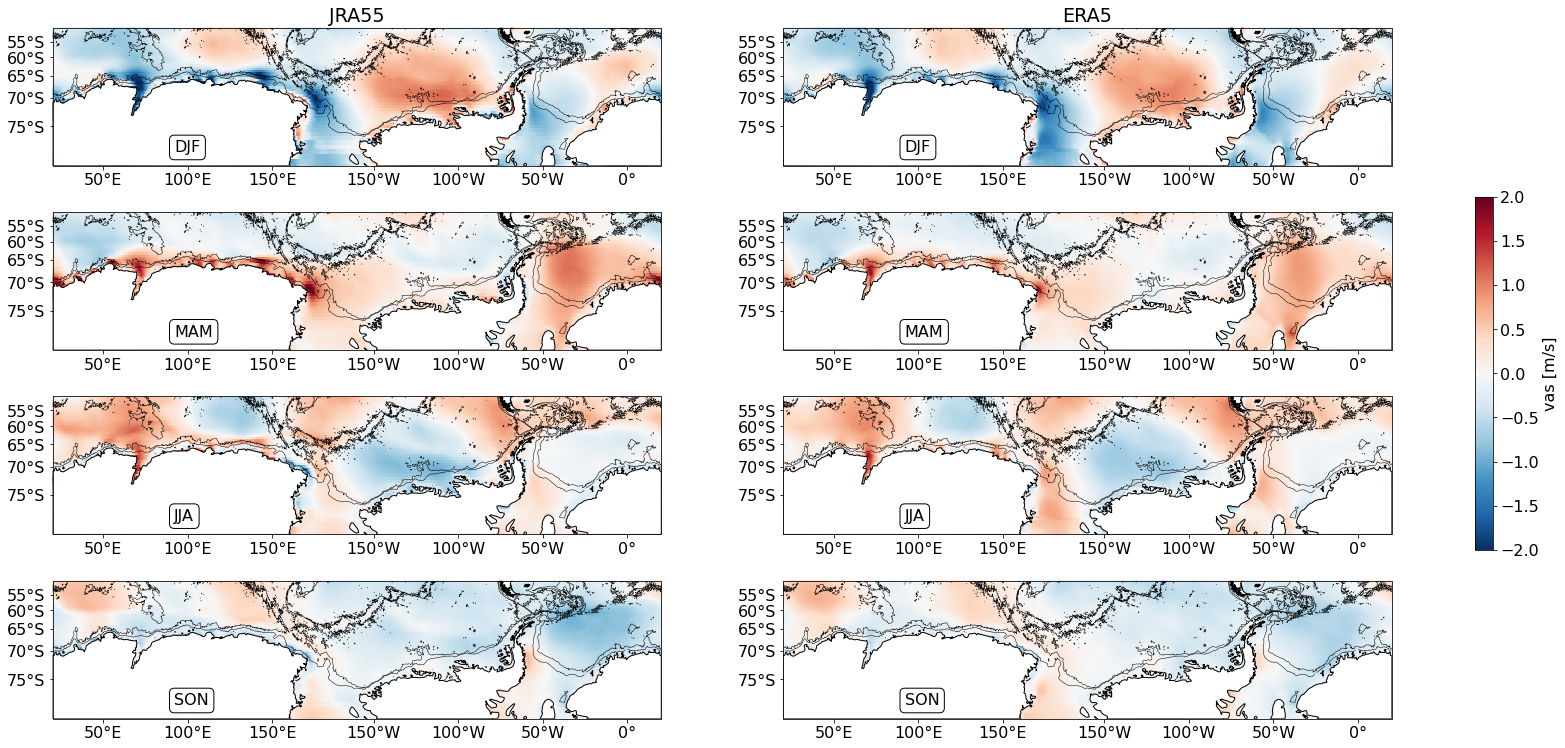

In [42]:
fig, axs = circumpolar_map_clim()
axs[0].pcolormesh(vas_jra_s['lon'], vas_jra_s['lat'], vas_jra_s.sel(season = 'DJF'), 
                  vmin = -2, vmax = 2, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
axs[1].pcolormesh(vas_era_s['lon'], vas_era_s['lat'], vas_era_s.sel(season = 'DJF'), 
                  vmin = -2, vmax = 2, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
axs[2].pcolormesh(vas_jra_s['lon'], vas_jra_s['lat'], vas_jra_s.sel(season = 'MAM'), 
                  vmin = -2, vmax = 2, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
axs[3].pcolormesh(vas_era_s['lon'], vas_era_s['lat'], vas_era_s.sel(season = 'MAM'), 
                  vmin = -2, vmax = 2, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
axs[4].pcolormesh(vas_jra_s['lon'], vas_jra_s['lat'], vas_jra_s.sel(season = 'JJA'), 
                  vmin = -2, vmax = 2, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
axs[5].pcolormesh(vas_era_s['lon'], vas_era_s['lat'], vas_era_s.sel(season = 'JJA'), 
                  vmin = -2, vmax = 2, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
axs[6].pcolormesh(vas_jra_s['lon'], vas_jra_s['lat'], vas_jra_s.sel(season = 'SON'), 
                  vmin = -2, vmax = 2, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
c = axs[7].pcolormesh(vas_era_s['lon'], vas_era_s['lat'], vas_era_s.sel(season = 'SON'), 
                      vmin = -2, vmax = 2, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
for ax in axs:
    ax.contour(hu['lon'], hu['lat'], hu, levels = [1000, 3000], colors = ['k'], linewidths = [.5], transform = ccrs.PlateCarree())
fig.colorbar(c, ax = axs[:], shrink = .5).set_label('vas [m/s]')
plt.savefig(figdir+'/easterlies-collaborative/vas-jra55_vs_era5-historical-climatology.png', facecolor = 'white')

# Seasonal trends

## uas

In [43]:
uas_djf = uas_jra.where(uas_jra['time.season'] == 'DJF', drop = True).isel(time = slice(2, -1))
uas_mam = uas_jra.where(uas_jra['time.season'] == 'MAM', drop = True).isel(time = slice(3, None))
uas_jja = uas_jra.where(uas_jra['time.season'] == 'JJA', drop = True).isel(time = slice(3, None))
uas_son = uas_jra.where(uas_jra['time.season'] == 'SON', drop = True).isel(time = slice(3, None))
uas_djf_jra = np.empty([35, 71, 640])
uas_mam_jra = np.empty([35, 71, 640])
uas_jja_jra = np.empty([35, 71, 640])
uas_son_jra = np.empty([35, 71, 640]); n = 0
for i in np.arange(0, 105, 3):
    uas_djf_jra[n, :, :] = uas_djf['uas'].isel(time = slice(i, i+3)).mean('time')
    uas_mam_jra[n, :, :] = uas_mam['uas'].isel(time = slice(i, i+3)).mean('time')
    uas_jja_jra[n, :, :] = uas_jja['uas'].isel(time = slice(i, i+3)).mean('time')
    uas_son_jra[n, :, :] = uas_son['uas'].isel(time = slice(i, i+3)).mean('time'); n+=1 

uas_djf_jra = xr.DataArray(uas_djf_jra, dims = ['year', 'lat', 'lon'], 
                           coords = {'year':np.arange(1979, 2014, 1), 'lat':uas_jra['lat'], 'lon':uas_jra['lon']})
uas_mam_jra = xr.DataArray(uas_mam_jra, dims = ['year', 'lat', 'lon'], 
                           coords = {'year':np.arange(1979, 2014, 1), 'lat':uas_jra['lat'], 'lon':uas_jra['lon']})
uas_jja_jra = xr.DataArray(uas_jja_jra, dims = ['year', 'lat', 'lon'], 
                           coords = {'year':np.arange(1979, 2014, 1), 'lat':uas_jra['lat'], 'lon':uas_jra['lon']})
uas_son_jra = xr.DataArray(uas_son_jra, dims = ['year', 'lat', 'lon'], 
                           coords = {'year':np.arange(1979, 2014, 1), 'lat':uas_jra['lat'], 'lon':uas_jra['lon']})
uas_jra_seasonal = xr.Dataset({'DJF':uas_djf_jra, 'MAM':uas_mam_jra, 'JJA':uas_jja_jra, 'SON':uas_son_jra})

In [46]:
uas_djf = uas_era.where(uas_era['time.season'] == 'DJF', drop = True).isel(time = slice(2, -1))
uas_mam = uas_era.where(uas_era['time.season'] == 'MAM', drop = True).isel(time = slice(3, None))
uas_jja = uas_era.where(uas_era['time.season'] == 'JJA', drop = True).isel(time = slice(3, None))
uas_son = uas_era.where(uas_era['time.season'] == 'SON', drop = True).isel(time = slice(3, None))
uas_djf_era = np.empty([35, 161,1440])
uas_mam_era = np.empty([35, 161,1440])
uas_jja_era = np.empty([35, 161,1440])
uas_son_era = np.empty([35, 161,1440]); n = 0
for i in np.arange(0, 105, 3):
    uas_djf_era[n, :, :] = uas_djf['u10'].isel(time = slice(i, i+3)).mean('time')
    uas_mam_era[n, :, :] = uas_mam['u10'].isel(time = slice(i, i+3)).mean('time')
    uas_jja_era[n, :, :] = uas_jja['u10'].isel(time = slice(i, i+3)).mean('time')
    uas_son_era[n, :, :] = uas_son['u10'].isel(time = slice(i, i+3)).mean('time'); n+=1 

uas_djf_era = xr.DataArray(uas_djf_era, dims = ['year', 'lat', 'lon'], 
                           coords = {'year':np.arange(1979, 2014, 1), 'lat':uas_era['lat'], 'lon':uas_era['lon']})
uas_mam_era = xr.DataArray(uas_mam_era, dims = ['year', 'lat', 'lon'], 
                           coords = {'year':np.arange(1979, 2014, 1), 'lat':uas_era['lat'], 'lon':uas_era['lon']})
uas_jja_era = xr.DataArray(uas_jja_era, dims = ['year', 'lat', 'lon'], 
                           coords = {'year':np.arange(1979, 2014, 1), 'lat':uas_era['lat'], 'lon':uas_era['lon']})
uas_son_era = xr.DataArray(uas_son_era, dims = ['year', 'lat', 'lon'], 
                           coords = {'year':np.arange(1979, 2014, 1), 'lat':uas_era['lat'], 'lon':uas_era['lon']})
uas_era_seasonal = xr.Dataset({'DJF':uas_djf_era, 'MAM':uas_mam_era, 'JJA':uas_jja_era, 'SON':uas_son_era})

In [47]:
MK_trends_uas_jra_seasonal = {}
for season in ['DJF', 'MAM', 'JJA', 'SON']:
    MK_class = Mann_Kendall_test(uas_jra_seasonal[season], 'time', coords_name = {'year':'time', 'lat':'y', 'lon':'x'})
    MK_trends_uas_jra_seasonal[season] = MK_class.compute()

In [48]:
MK_trends_uas_era_seasonal = {}
for season in ['DJF', 'MAM', 'JJA', 'SON']:
    MK_class = Mann_Kendall_test(uas_era_seasonal[season], 'time', coords_name = {'year':'time', 'lat':'y', 'lon':'x'})
    MK_trends_uas_era_seasonal[season] = MK_class.compute()

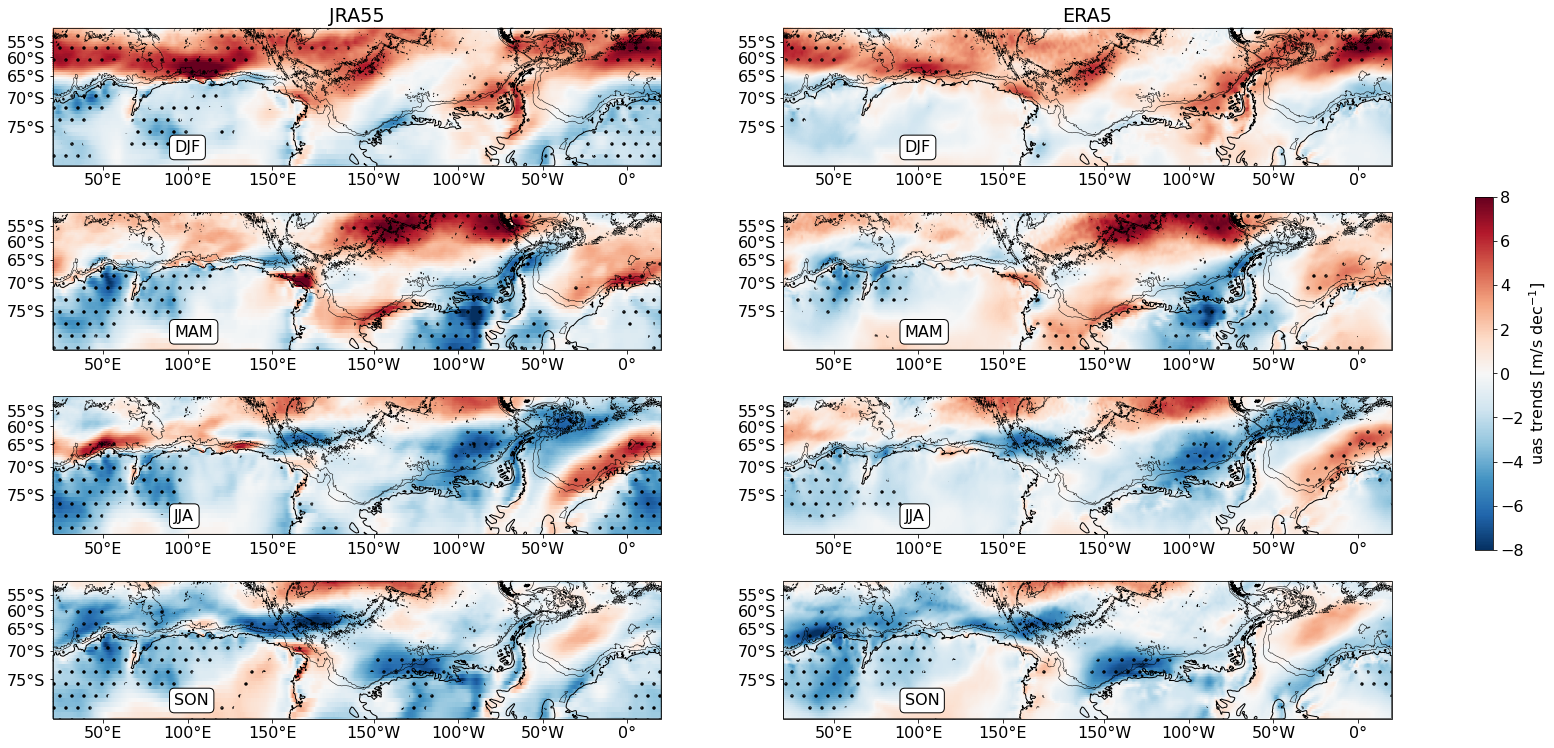

In [49]:
fig, axs = circumpolar_map_clim(land = False); n=0
for s in ['DJF', 'MAM', 'JJA', 'SON']:
    axs[n].pcolormesh(MK_trends_uas_jra_seasonal[s]['x'], MK_trends_uas_jra_seasonal[s]['y'],
                      MK_trends_uas_jra_seasonal[s]['trend']*120, 
                      vmin = -8, vmax = 8, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
    axs[n].contourf(MK_trends_uas_jra_seasonal[s]['x'], MK_trends_uas_jra_seasonal[s]['y'],
                    MK_trends_uas_jra_seasonal[s]['p'].where(MK_trends_uas_jra_seasonal[s]['p'] <= .1), 
                    colors = ['none'], hatches = ['.'], transform = ccrs.PlateCarree())
    c = axs[n+1].pcolormesh(MK_trends_uas_era_seasonal[s]['x'], MK_trends_uas_era_seasonal[s]['y'],
                      MK_trends_uas_era_seasonal[s]['trend']*120, 
                      vmin = -8, vmax = 8, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
    axs[n+1].contourf(MK_trends_uas_era_seasonal[s]['x'], MK_trends_uas_era_seasonal[s]['y'],
                    MK_trends_uas_era_seasonal[s]['p'].where(MK_trends_uas_era_seasonal[s]['p'] <= .1), 
                    colors = ['none'], hatches = ['.'], transform = ccrs.PlateCarree())
    n+=2
    
for ax in axs:
    ax.contour(hu['lon'], hu['lat'], hu, levels = [1000, 3000], colors = ['k'], linewidths = [.5], transform = ccrs.PlateCarree())
fig.colorbar(c, ax = axs[:], shrink = .5).set_label('uas trends [m/s dec$^{-1}$]')
plt.savefig(figdir+'/easterlies-collaborative/uas-jra55_vs_era5-historical-trends-seasonal.png', facecolor = 'white')

## vas

In [50]:
vas_djf = vas_jra.where(vas_jra['time.season'] == 'DJF', drop = True).isel(time = slice(2, -1))
vas_mam = vas_jra.where(vas_jra['time.season'] == 'MAM', drop = True).isel(time = slice(3, None))
vas_jja = vas_jra.where(vas_jra['time.season'] == 'JJA', drop = True).isel(time = slice(3, None))
vas_son = vas_jra.where(vas_jra['time.season'] == 'SON', drop = True).isel(time = slice(3, None))
vas_djf_jra = np.empty([35, 71, 640])
vas_mam_jra = np.empty([35, 71, 640])
vas_jja_jra = np.empty([35, 71, 640])
vas_son_jra = np.empty([35, 71, 640]); n = 0
for i in np.arange(0, 105, 3):
    vas_djf_jra[n, :, :] = vas_djf['vas'].isel(time = slice(i, i+3)).mean('time')
    vas_mam_jra[n, :, :] = vas_mam['vas'].isel(time = slice(i, i+3)).mean('time')
    vas_jja_jra[n, :, :] = vas_jja['vas'].isel(time = slice(i, i+3)).mean('time')
    vas_son_jra[n, :, :] = vas_son['vas'].isel(time = slice(i, i+3)).mean('time'); n+=1 

vas_djf_jra = xr.DataArray(vas_djf_jra, dims = ['year', 'lat', 'lon'], 
                           coords = {'year':np.arange(1979, 2014, 1), 'lat':vas_jra['lat'], 'lon':vas_jra['lon']})
vas_mam_jra = xr.DataArray(vas_mam_jra, dims = ['year', 'lat', 'lon'], 
                           coords = {'year':np.arange(1979, 2014, 1), 'lat':vas_jra['lat'], 'lon':vas_jra['lon']})
vas_jja_jra = xr.DataArray(vas_jja_jra, dims = ['year', 'lat', 'lon'], 
                           coords = {'year':np.arange(1979, 2014, 1), 'lat':vas_jra['lat'], 'lon':vas_jra['lon']})
vas_son_jra = xr.DataArray(vas_son_jra, dims = ['year', 'lat', 'lon'], 
                           coords = {'year':np.arange(1979, 2014, 1), 'lat':vas_jra['lat'], 'lon':vas_jra['lon']})
vas_jra_seasonal = xr.Dataset({'DJF':vas_djf_jra, 'MAM':vas_mam_jra, 'JJA':vas_jja_jra, 'SON':vas_son_jra})

In [53]:
vas_djf = vas_era.where(vas_era['time.season'] == 'DJF', drop = True).isel(time = slice(2, -1))
vas_mam = vas_era.where(vas_era['time.season'] == 'MAM', drop = True).isel(time = slice(3, None))
vas_jja = vas_era.where(vas_era['time.season'] == 'JJA', drop = True).isel(time = slice(3, None))
vas_son = vas_era.where(vas_era['time.season'] == 'SON', drop = True).isel(time = slice(3, None))
vas_djf_era = np.empty([35, 161, 1440])
vas_mam_era = np.empty([35, 161, 1440])
vas_jja_era = np.empty([35, 161, 1440])
vas_son_era = np.empty([35, 161, 1440]); n = 0
for i in np.arange(0, 105, 3):
    vas_djf_era[n, :, :] = vas_djf['v10'].isel(time = slice(i, i+3)).mean('time')
    vas_mam_era[n, :, :] = vas_mam['v10'].isel(time = slice(i, i+3)).mean('time')
    vas_jja_era[n, :, :] = vas_jja['v10'].isel(time = slice(i, i+3)).mean('time')
    vas_son_era[n, :, :] = vas_son['v10'].isel(time = slice(i, i+3)).mean('time'); n+=1 

vas_djf_era = xr.DataArray(vas_djf_era, dims = ['year', 'lat', 'lon'], 
                           coords = {'year':np.arange(1979, 2014, 1), 'lat':vas_era['lat'], 'lon':vas_era['lon']})
vas_mam_era = xr.DataArray(vas_mam_era, dims = ['year', 'lat', 'lon'], 
                           coords = {'year':np.arange(1979, 2014, 1), 'lat':vas_era['lat'], 'lon':vas_era['lon']})
vas_jja_era = xr.DataArray(vas_jja_era, dims = ['year', 'lat', 'lon'], 
                           coords = {'year':np.arange(1979, 2014, 1), 'lat':vas_era['lat'], 'lon':vas_era['lon']})
vas_son_era = xr.DataArray(vas_son_era, dims = ['year', 'lat', 'lon'], 
                           coords = {'year':np.arange(1979, 2014, 1), 'lat':vas_era['lat'], 'lon':vas_era['lon']})
vas_era_seasonal = xr.Dataset({'DJF':vas_djf_era, 'MAM':vas_mam_era, 'JJA':vas_jja_era, 'SON':vas_son_era})

In [54]:
MK_trends_vas_jra_seasonal = {}
for season in ['DJF', 'MAM', 'JJA', 'SON']:
    MK_class = Mann_Kendall_test(vas_jra_seasonal[season], 'time', coords_name = {'year':'time', 'lat':'y', 'lon':'x'})
    MK_trends_vas_jra_seasonal[season] = MK_class.compute()

In [55]:
MK_trends_vas_era_seasonal = {}
for season in ['DJF', 'MAM', 'JJA', 'SON']:
    MK_class = Mann_Kendall_test(vas_era_seasonal[season], 'time', coords_name = {'year':'time', 'lat':'y', 'lon':'x'})
    MK_trends_vas_era_seasonal[season] = MK_class.compute()

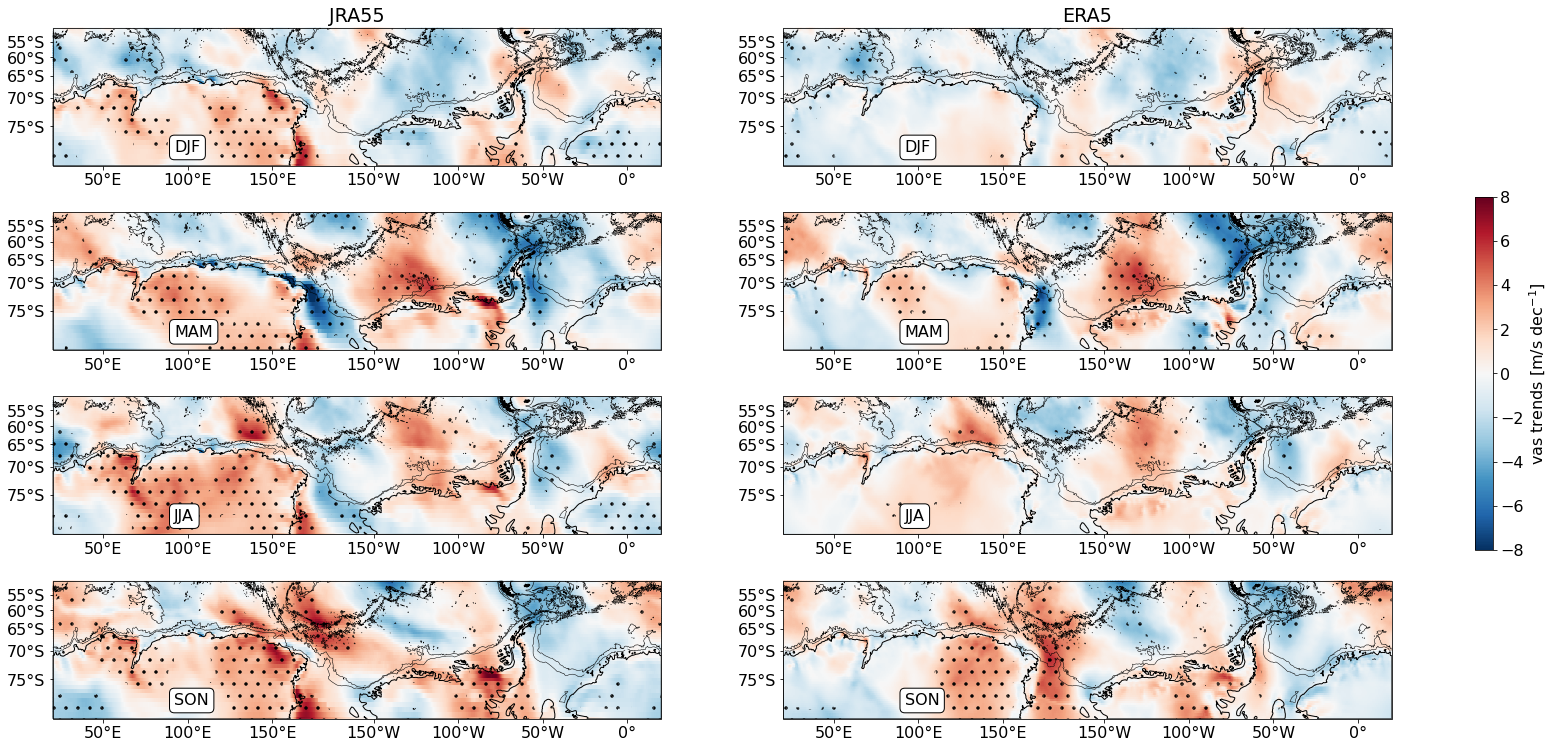

In [56]:
fig, axs = circumpolar_map_clim(land = False); n=0
for s in ['DJF', 'MAM', 'JJA', 'SON']:
    axs[n].pcolormesh(MK_trends_vas_jra_seasonal[s]['x'], MK_trends_vas_jra_seasonal[s]['y'],
                      MK_trends_vas_jra_seasonal[s]['trend']*120, 
                      vmin = -8, vmax = 8, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
    axs[n].contourf(MK_trends_vas_jra_seasonal[s]['x'], MK_trends_vas_jra_seasonal[s]['y'],
                    MK_trends_vas_jra_seasonal[s]['p'].where(MK_trends_vas_jra_seasonal[s]['p'] <= .1), 
                    colors = ['none'], hatches = ['.'], transform = ccrs.PlateCarree())
    c = axs[n+1].pcolormesh(MK_trends_vas_era_seasonal[s]['x'], MK_trends_vas_era_seasonal[s]['y'],
                      MK_trends_vas_era_seasonal[s]['trend']*120, 
                      vmin = -8, vmax = 8, cmap = 'RdBu_r', transform = ccrs.PlateCarree())
    axs[n+1].contourf(MK_trends_vas_era_seasonal[s]['x'], MK_trends_vas_era_seasonal[s]['y'],
                    MK_trends_vas_era_seasonal[s]['p'].where(MK_trends_vas_era_seasonal[s]['p'] <= .1), 
                    colors = ['none'], hatches = ['.'], transform = ccrs.PlateCarree())
    n+=2
    
for ax in axs:
    ax.contour(hu['lon'], hu['lat'], hu, levels = [1000, 3000], colors = ['k'], linewidths = [.5], transform = ccrs.PlateCarree())
fig.colorbar(c, ax = axs[:], shrink = .5).set_label('vas trends [m/s dec$^{-1}$]')
plt.savefig(figdir+'/easterlies-collaborative/vas-jra55_vs_era5-historical-trends-seasonal.png', facecolor = 'white')

# Zonal averages

In [61]:
uas_era_ss = uas_era['u10'].groupby('time.season').mean('time')
uas_jra_ss = uas_jra['uas'].groupby('time.season').mean('time')
vas_era_ss = vas_era['v10'].groupby('time.season').mean('time')
vas_jra_ss = vas_jra['vas'].groupby('time.season').mean('time')

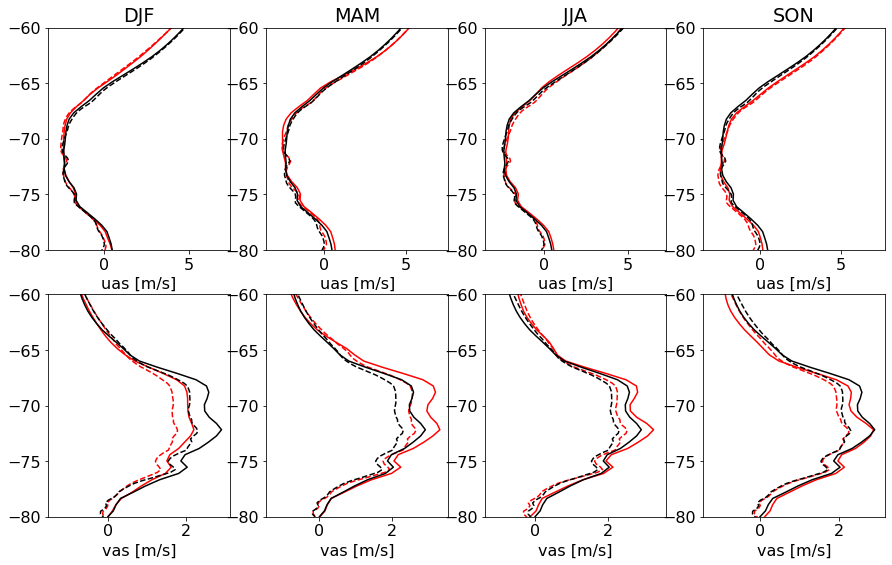

In [63]:
fig = plt.figure(figsize = (15, 9))
axs = [fig.add_subplot(241), fig.add_subplot(242), fig.add_subplot(243), fig.add_subplot(244),
       fig.add_subplot(245), fig.add_subplot(246), fig.add_subplot(247), fig.add_subplot(248)]
n = 0
for s in ['DJF', 'MAM', 'JJA', 'SON']:
    axs[n].plot(uas_era_ss.sel(season = s).mean('lon'), uas_era['u10']['lat'], 'r', linestyle = '--')   
    axs[n].plot(uas_jra_ss.sel(season = s).mean('lon'), uas_jra['uas']['lat'], 'r', label = s)
    axs[n].set_title(s)
    axs[n+4].plot(vas_era_ss.sel(season = s).mean('lon'), uas_era['u10']['lat'], 'r', linestyle = '--')   
    axs[n+4].plot(vas_jra_ss.sel(season = s).mean('lon'), uas_jra['uas']['lat'], 'r', label = s)
    n+=1
for ax in axs:
    if ax in axs[0:4]:
        ax.plot(uas_era['u10'].mean('time').mean('lon'), uas_era['u10']['lat'], 'k', linestyle = '--')   
        ax.plot(uas_jra['uas'].mean('time').mean('lon'), uas_jra['uas']['lat'], 'k', label = 'Mean')
        ax.set_xlabel('uas [m/s]')
    else:
        ax.plot(vas_era['v10'].mean('time').mean('lon'), uas_era['u10']['lat'], 'k', linestyle = '--')   
        ax.plot(vas_jra['vas'].mean('time').mean('lon'), uas_jra['uas']['lat'], 'k', label = 'Mean')
        ax.set_xlabel('vas [m/s]')
    ax.set_ylim(-80, -60)
plt.savefig(figdir+'/easterlies-collaborative/uas-vas-zonal_mean-era5.png', facecolor = 'white', bbox_inches = 'tight')

# Time series

Ala Hazel

In [64]:
shelf_regions = xr.open_dataset('~/g_e14/misc/Antarctic_shelf_basins.nc')
shelf_regions = change_lon_space(shelf_regions, 't')
basins = shelf_regions['basins'].where(shelf_regions['basins'] != 100, np.nan)

In [65]:
locs = list(shelf_regions['basin_lookup']['region'][:-1].values)
locs.remove('East Antarctica 04')

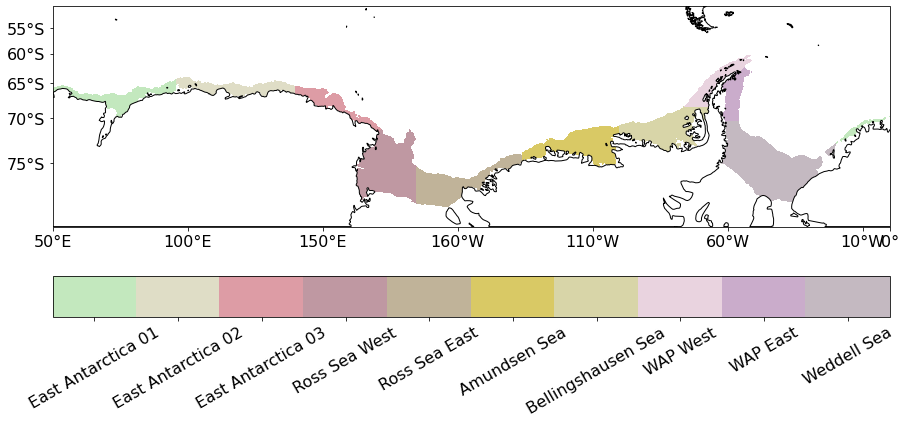

In [65]:
fig = plt.figure(figsize = (15, 6))
ax = fig.add_subplot(projection = ccrs.Mercator(central_longitude = 200))
ax.set_extent([0, 2600, -80, -50], crs = ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                       edgecolor = 'black', facecolor = 'white'))
ax.set_xticks(np.arange(0, 400, 50), crs = ccrs.PlateCarree())
ax.set_yticks([-75, -70, -65, -60, -55], crs = ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label = False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
c = ax.contourf(basins['lon'], basins['lat'], basins, levels = np.arange(2, 13, 1), cmap = Set3_11.mpl_colormap, transform = ccrs.PlateCarree())
cbar = plt.colorbar(c, ax = ax, orientation = 'horizontal')
cbar.set_ticks(np.arange(2.5, 12.5, 1))
cbar.ax.set_xticklabels(locs, rotation = 30)
plt.savefig(figdir+'/easterlies-collaborative/basins-reference.png', facecolor = 'white', bbox_inches = 'tight')

In [66]:
basins_jra = basins.interp(lon = uas_jra['lon'], lat = uas_jra['lat'])
basins_era = basins.interp(lon = uas_era['lon'], lat = uas_era['lat'])

In [67]:
uas_reg = {}
vas_reg = {}
n = 2
for r in locs:
    uas_reg[r, 'JRA'] = uas_jra['uas'].where(basins_jra == n, np.nan).mean(['lon', 'lat']).groupby('time.year').mean('time')
    uas_reg[r, 'ERA'] = uas_era['u10'].where(basins_era == n, np.nan).mean(['lon', 'lat']).groupby('time.year').mean('time')
    vas_reg[r, 'JRA'] = vas_jra['vas'].where(basins_jra == n, np.nan).mean(['lon', 'lat']).groupby('time.year').mean('time')
    vas_reg[r, 'ERA'] = vas_era['v10'].where(basins_era == n, np.nan).mean(['lon', 'lat']).groupby('time.year').mean('time')
    n += 1

In [68]:
legend_elements = [Line2D([0], [0], color = 'lightcoral', lw = 1.2, label = 'JRA55'),
                   Line2D([0], [0], color = 'lightsteelblue', lw = 1.2, label = 'ERA5')]

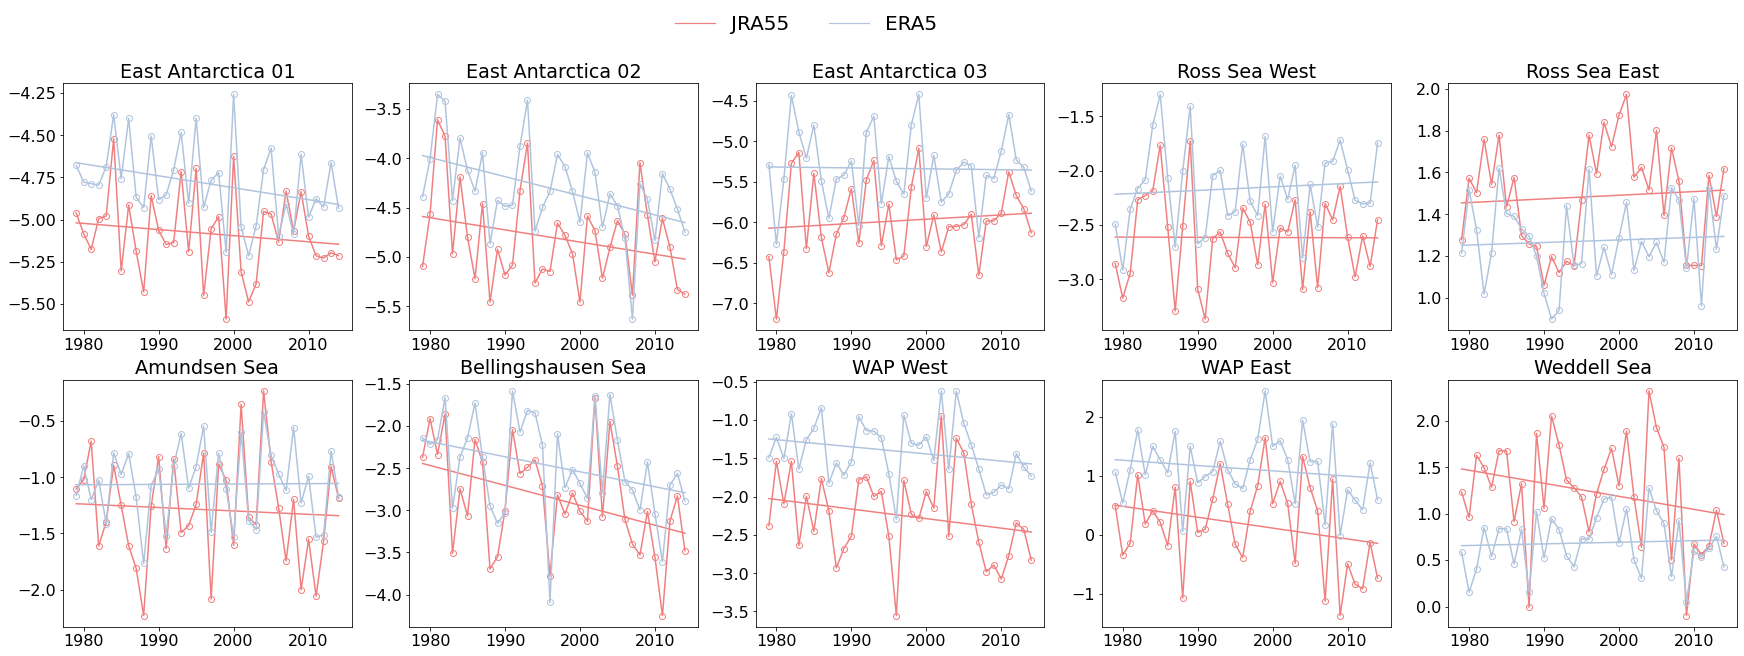

In [69]:
fig = plt.figure(figsize = (30, 10))
gr = gs.GridSpec(2, 5, figure = fig)
axs = [fig.add_subplot(gr[0,0]), fig.add_subplot(gr[0,1]), fig.add_subplot(gr[0,2]), fig.add_subplot(gr[0,3]),
       fig.add_subplot(gr[0,4]), fig.add_subplot(gr[1,0]), fig.add_subplot(gr[1,1]), fig.add_subplot(gr[1,2]),
       fig.add_subplot(gr[1,3]), fig.add_subplot(gr[1,4])]; n = 0
for r in locs:
    pf1 = np.polyfit(uas_reg[r, 'JRA']['year'], uas_reg[r, 'JRA'], 1)
    pf2 = np.polyfit(uas_reg[r, 'ERA']['year'], uas_reg[r, 'ERA'], 1)
    axs[n].plot(uas_reg[r, 'JRA']['year'], uas_reg[r, 'JRA'], color = 'lightcoral', marker = 'o', markerfacecolor = 'none')
    axs[n].plot(uas_reg[r, 'JRA']['year'], pf1[1]+pf1[0]*uas_reg[r, 'JRA']['year'], color = 'lightcoral')
    axs[n].plot(uas_reg[r, 'ERA']['year'], uas_reg[r, 'ERA'], color = 'lightsteelblue', marker = 'o', markerfacecolor = 'none')
    axs[n].plot(uas_reg[r, 'ERA']['year'], pf2[1]+pf2[0]*uas_reg[r, 'ERA']['year'], color = 'lightsteelblue')
    axs[n].set_title(r)
    n+=1
fig.legend(handles = legend_elements, ncol = 2, loc = 'upper left', bbox_to_anchor = (.4, 1), fontsize = 20, frameon = False)
plt.savefig(figdir+'/easterlies-collaborative/uas_onshelf-regions-yearly-era5.png', facecolor = 'white', bbox_inches = 'tight')

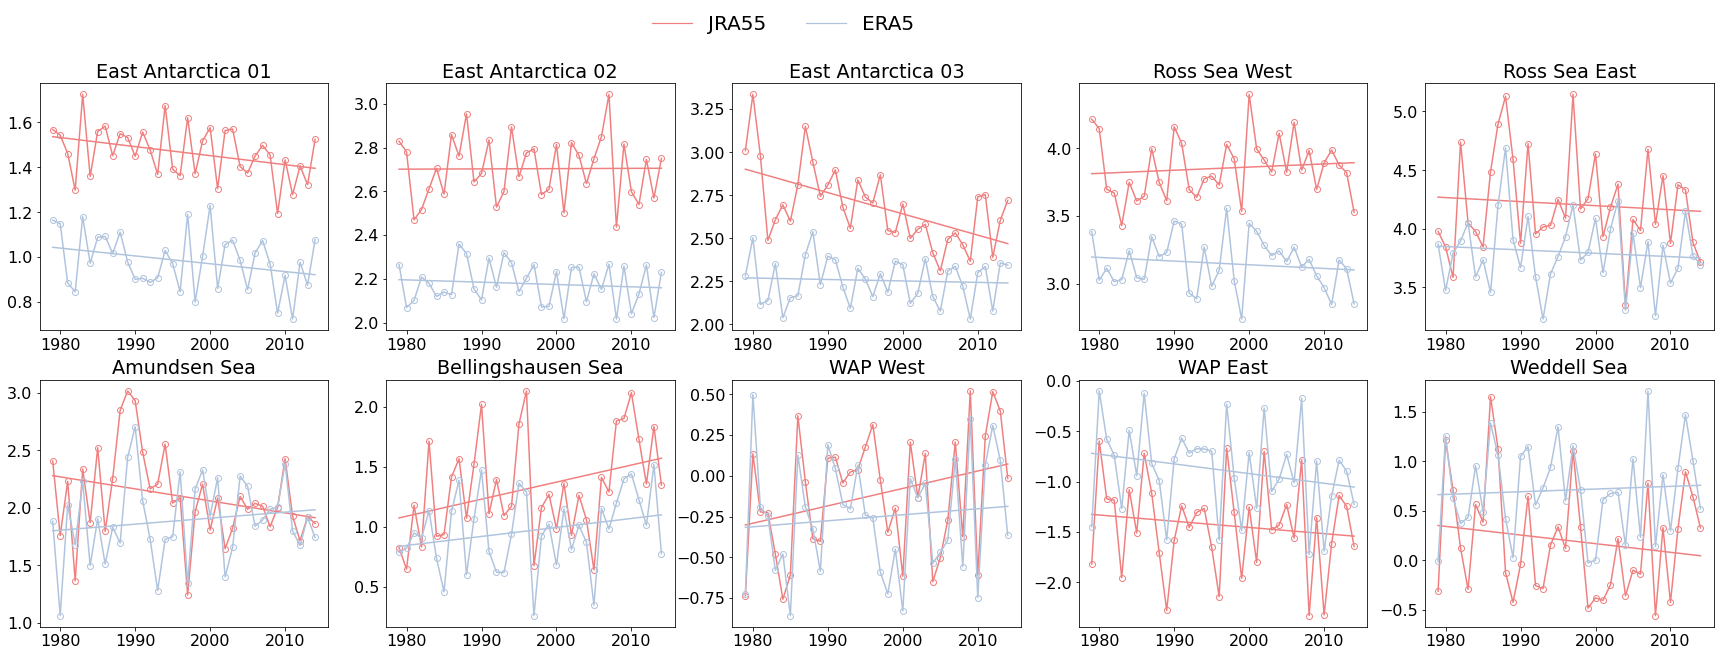

In [70]:
fig = plt.figure(figsize = (30, 10))
gr = gs.GridSpec(2, 5, figure = fig)
axs = [fig.add_subplot(gr[0,0]), fig.add_subplot(gr[0,1]), fig.add_subplot(gr[0,2]), fig.add_subplot(gr[0,3]),
       fig.add_subplot(gr[0,4]), fig.add_subplot(gr[1,0]), fig.add_subplot(gr[1,1]), fig.add_subplot(gr[1,2]),
       fig.add_subplot(gr[1,3]), fig.add_subplot(gr[1,4])]; n = 0
for r in locs:
    pf1 = np.polyfit(vas_reg[r, 'JRA']['year'], vas_reg[r, 'JRA'], 1)
    pf2 = np.polyfit(vas_reg[r, 'ERA']['year'], vas_reg[r, 'ERA'], 1)
    axs[n].plot(vas_reg[r, 'JRA']['year'], vas_reg[r, 'JRA'], color = 'lightcoral', marker = 'o', markerfacecolor = 'none')
    axs[n].plot(vas_reg[r, 'JRA']['year'], pf1[1]+pf1[0]*vas_reg[r, 'JRA']['year'], color = 'lightcoral')
    axs[n].plot(vas_reg[r, 'ERA']['year'], vas_reg[r, 'ERA'], color = 'lightsteelblue', marker = 'o', markerfacecolor = 'none')
    axs[n].plot(vas_reg[r, 'ERA']['year'], pf2[1]+pf2[0]*vas_reg[r, 'ERA']['year'], color = 'lightsteelblue')
    axs[n].set_title(r)
    n+=1
fig.legend(handles = legend_elements, ncol = 2, loc = 'upper left', bbox_to_anchor = (.4, 1), fontsize = 20, frameon = False)
plt.savefig(figdir+'/easterlies-collaborative/vas_onshelf-regions-yearly-era5.png', facecolor = 'white', bbox_inches = 'tight')